# External Conditions for Tsunami Model

### Step 1: Import Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt


### Step 2: Define the Model Grid


In [5]:
delX = 1/12
delY = 1/16 
xgOrigin = -158  
ygOrigin = 65  
n_rows = 360     
n_cols = 240     

xc = np.arange(xgOrigin + delX / 2, xgOrigin + n_cols * delX, delX)
yc = np.arange(ygOrigin + delY / 2, ygOrigin + n_rows * delY, delY)
XC, YC = np.meshgrid(xc, yc)


### Step 3: Define Wind Stress Fields

In this step, we create two external forcing conditions:

With Wind: A uniform wind stress field with eastward (tau_x) and northward (tau_y) components.
No Wind: A control case with zero wind stress.

In [10]:
tau_x = 0.1 * np.ones_like(XC)
tau_y = 0.05 * np.ones_like(YC) 

tau_x_no_wind = np.zeros_like(XC)
tau_y_no_wind = np.zeros_like(YC)


### Step 4: Plot the Wind Stress Fields

Here, we plot both the "with wind" and "no wind" cases to visually compare the two conditions

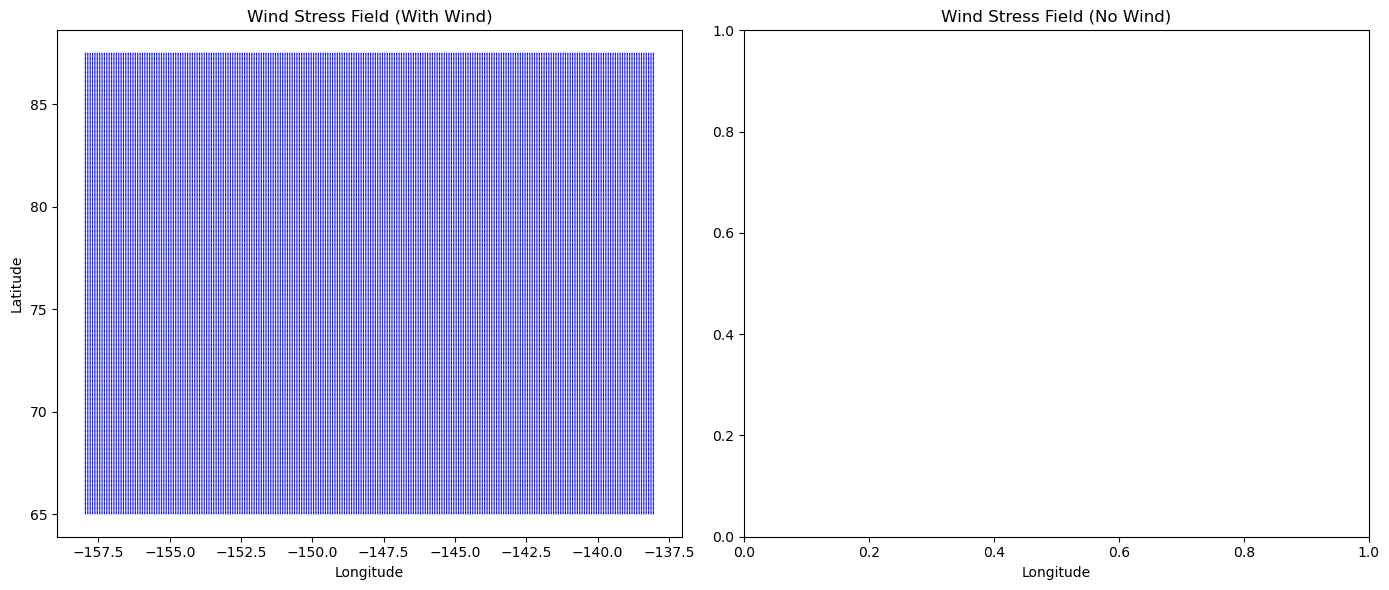

In [14]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.quiver(XC, YC, tau_x, tau_y, color='blue')
plt.title("Wind Stress Field (With Wind)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.subplot(1, 2, 2)
if np.any(tau_x_no_wind != 0) or np.any(tau_y_no_wind != 0):
    plt.quiver(XC, YC, tau_x_no_wind, tau_y_no_wind, color='gray')
plt.title("Wind Stress Field (No Wind)")
plt.xlabel("Longitude")
plt.tight_layout()
plt.show()


### Step 5: Save External Forcing Conditions

To use these forcing conditions in our model, we save each as a separate file (wind_forcing.npz and no_wind_forcing.npz).

In [17]:
np.savez('wind_forcing.npz', tau_x=tau_x, tau_y=tau_y)
np.savez('no_wind_forcing.npz', tau_x=tau_x_no_wind, tau_y=tau_y_no_wind)

### How to Implement External Forcing Conditions at Runtime

1. load either wind_forcing.npz or no_wind_forcing.npz into the model
2. Make sure the model reads the wind stress arrays tau_x and tau_y from the file
3. Set tau_x and tau_y as the wind stress forcing on the ocean surface in the model configuration.